## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


# Librerías

In [1]:
#!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import re
import string

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [6]:
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     E:\Users\83509\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     E:\Users\83509\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import gensim
from gensim.models import Word2Vec

In [8]:
from wordcloud import WordCloud
from collections import Counter

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
from scipy.sparse import csr_matrix

# 1. Preprocesamiento de Datos

## Carga de Datos

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
# Importando el dataset, considerando el error en el encode utf8 y el nombre de las variables definidas en kaggle.
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Limpieza de datos

Durante esta etapa se eliminan caracteres especiales, símbolos, puntuación, etiquetas HTML<>, entre otros elementos de los datos sin procesar que no contienen información útil para el aprendizaje del modelo.

### Eliminación de valores nulos

Como se observa en la siguientecelda, en este dataset no hay valores nulos. Todas las celdas contienen información

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### Función de limpieza de datos.

Se elaboró una función de limpieza de datos en donde se conjuntan las instrucciones para Remover los URLs, los números, los signos de puntuación, convertir a minúsculas y eliminar los espacios en blanco.

El hacer una función tiene la intención de evitar realizar pasos repetitivos así como facilitar la explicación del proceso, por ello, la explicación de los parámetros usados en la limpieza de datos se expondrá al final de notebook dentro del apartado **"Anexo"**.

es importante indicar que el proceso para convertir a minúsculas así como el elaborado para limpiar espacios en blanco no requieren mayor explicación, por lo que se omiten de las explicaciones vertidas en el "Anexo".

In [14]:
def cleantext(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_wo_url = url_pattern.sub('', text) # Remover URLs
    text_wo_numbers = re.sub(r'\d+', '', text_wo_url) # Remover números
    text_wo_punct = text_wo_numbers.translate(str.maketrans('', '', string.punctuation)) # Quitar signos de puntuación
    text_lower = text_wo_punct.lower() # Convertir a minúsculas
    text_wo_blank = text_lower.strip() # Eliminar espacios en blanco
    return text_wo_blank

# Limpieza de texto
df['text'] = df['text'].apply(cleantext)

df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt intervie...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday to my boo of alll time tupac...


# 2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tweet.

## Tokenizar por palabras

Para tokenizar las palabras así como para eliminar las palabras vacías o de parada, se utilizará la paquetería nltk, [Natural Language Toolkit (NLKT)](https://www.nltk.org/).

In [15]:
def tokenize_by_words(text):
    return nltk.word_tokenize(text)

# Tokenizar por palabras la columna "text"
df['text'] = df['text'].apply(tokenize_by_words)

df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[switchfoot, awww, thats, a, bummer, you, shou..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[is, upset, that, he, cant, update, his, faceb..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[kenichan, i, dived, many, times, for, the, ba..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[nationwideclass, no, its, not, behaving, at, ..."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,"[just, woke, up, having, no, school, is, the, ..."
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,"[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,"[happy, th, birthday, to, my, boo, of, alll, t..."


### Eliminar palabras vacias o palabras de parada

Las “palabras vacías” son vocablos como “the”, “a”, “on”, “is” y “all", que carecen de un significado importante y, por lo general, se eliminan de los textos.

In [16]:
stop_words_english = set(stopwords.words('english')) # se selecciona el idioma

# Función para eliminar palabras de parada
def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word not in stop_words_english]

# Aplicar la función a la columna 'Texto Tokenizado'
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

# Mostrar el DataFrame resultante
df['text_without_stopwords']

0          [switchfoot, awww, thats, bummer, shoulda, got...
1          [upset, cant, update, facebook, texting, might...
2          [kenichan, dived, many, times, ball, managed, ...
3                    [whole, body, feels, itchy, like, fire]
4            [nationwideclass, behaving, im, mad, cant, see]
                                 ...                        
1599995                  [woke, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text_without_stopwords, Length: 1600000, dtype: object

## Generar Nube de palabras de acuerdo al target del Tweet

Se utilizará la función WordCloud para generar visualizaciones de nubes de palabras que muestra las palabras más frecuentes en un conjunto de datos de texto, donde el tamaño de cada palabra es proporcional a su frecuencia.

Es importante indicar que, tal como se indica en la página Kaggle donde se encuentra la base de datos, la polaridad del tweet se define como 0 = negativo, 2 = neutral, 4 = positivo. Sin embargo, como se observa en la celda inferior solo hay comentarios correspondientes a las categoría 0 (negativos) y 4 ( positivos), los cuáles están divididos de forma simétrica (800,000 observaciones en cada categoría)

In [17]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [18]:
# Función para generar una nube de palabras
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

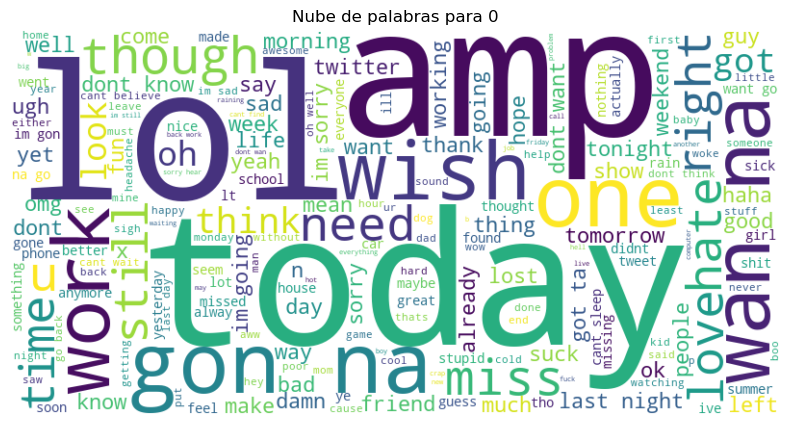

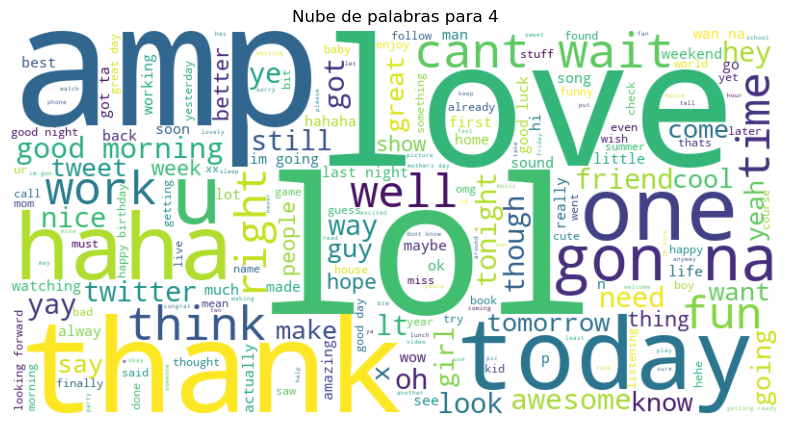

In [19]:
for category in df['target'].unique():
    subset = df[df['target'] == category]
    all_words = [word for sublist in subset['text_without_stopwords'] for word in sublist]
    generate_wordcloud(all_words, f'Nube de palabras para {category}')

## Crear gráfica de las palabras más comunes por categoría

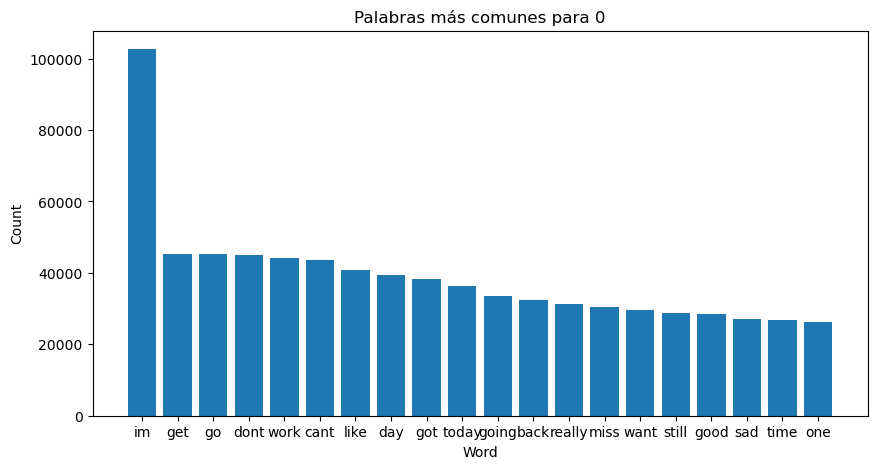

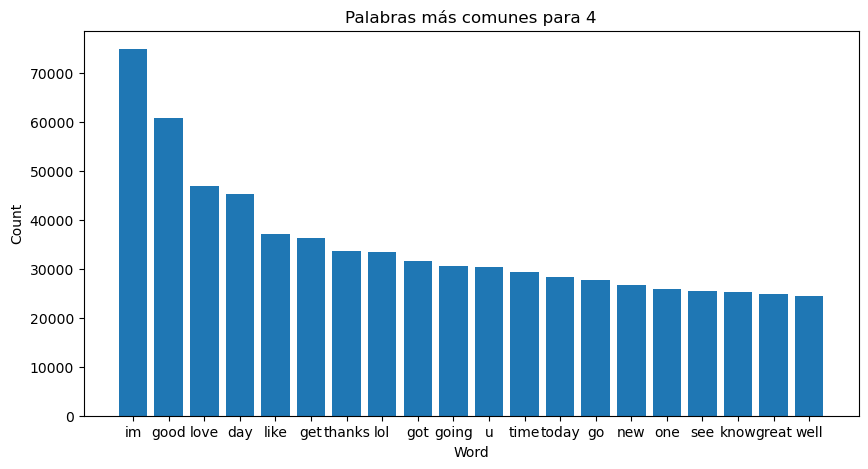

In [20]:
for category in df['target'].unique():
    subset = df[df['target'] == category]
    all_words = [word for sublist in subset['text_without_stopwords'] for word in sublist]
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(20)  # Las 20 palabras más comunes
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

    plt.figure(figsize=(10, 5))
    plt.bar(common_words_df['Word'], common_words_df['Count'])
    plt.title(f'Palabras más comunes para {category}')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.show()

# 3. Vectorización de los textos y justificación de la elección del vectorizador y optimizador.

Tal y como se hizo en el curso, el modelo de vectorización recibirá el nombre de `model_mini` y para estimarlos se utilizará la clase `Word2Vec`, cuyos parámetros se explican el anexo del texto.

Para este ejercicio se utilizará un vec_size de 100, con la intención de capturar la mayor cantidad posible de información en los vectores a obtener (1 x 100), sin embargo los valores típicos pueden oscilar entre 50 y 300, dependiendo del caso. Asimismo, se mantuvo en  1 el conteo mínimo para que cada palabra tenga su propio vector.

In [21]:
model_mini = Word2Vec(sentences=df['text_without_stopwords'], min_count=1, vector_size=100)

In [22]:
print(model_mini)

Word2Vec<vocab=742281, vector_size=100, alpha=0.025>


A continuación, se utiliza `.key_to_index` para ver las palabras que generaron algún tipo de vector.

In [23]:
model_mini.wv.key_to_index

{'im': 0,
 'good': 1,
 'day': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'got': 6,
 'dont': 7,
 'today': 8,
 'going': 9,
 'love': 10,
 'work': 11,
 'cant': 12,
 'time': 13,
 'back': 14,
 'lol': 15,
 'u': 16,
 'one': 17,
 'know': 18,
 'really': 19,
 'see': 20,
 'well': 21,
 'still': 22,
 'want': 23,
 'new': 24,
 'na': 25,
 'night': 26,
 'think': 27,
 'amp': 28,
 'thanks': 29,
 'home': 30,
 'oh': 31,
 'much': 32,
 'miss': 33,
 'need': 34,
 'last': 35,
 'morning': 36,
 'hope': 37,
 'great': 38,
 'tomorrow': 39,
 'ill': 40,
 'twitter': 41,
 'thats': 42,
 'haha': 43,
 'feel': 44,
 'sad': 45,
 'fun': 46,
 'wish': 47,
 'right': 48,
 'didnt': 49,
 'sleep': 50,
 'bad': 51,
 'would': 52,
 'happy': 53,
 'sorry': 54,
 'tonight': 55,
 'come': 56,
 'make': 57,
 'getting': 58,
 'way': 59,
 'gon': 60,
 'though': 61,
 'nice': 62,
 'ive': 63,
 'better': 64,
 'watching': 65,
 'wait': 66,
 'could': 67,
 'yeah': 68,
 'bed': 69,
 'week': 70,
 'youre': 71,
 'people': 72,
 'school': 73,
 'hate': 74,
 'days': 75,
 '

In [24]:
X_mini = model_mini.wv[model_mini.wv.index_to_key]

In [25]:
X_mini

array([[ 1.18765628e+00,  3.49754500e+00, -6.24105513e-01, ...,
        -2.11366749e+00,  1.20810533e+00, -6.67978764e-01],
       [-1.07743716e+00, -1.78350353e+00,  1.62086403e+00, ...,
        -1.18178137e-01,  1.50589406e-01, -1.50191331e+00],
       [-1.95173228e+00,  6.17116690e-01, -2.13923430e+00, ...,
        -9.47954729e-02,  3.34131908e+00,  8.35495651e-01],
       ...,
       [ 3.98853794e-03,  5.25519485e-03,  1.09754205e-02, ...,
        -1.18253287e-02,  6.89355470e-03, -1.13325892e-02],
       [-4.90867719e-03, -1.16284499e-02, -1.55028573e-03, ...,
        -1.43492119e-02,  5.75105380e-03,  5.37790963e-03],
       [ 1.40330754e-02,  6.48584729e-03, -2.14810879e-03, ...,
         6.92487741e-03, -1.46880373e-02,  3.91290570e-03]], dtype=float32)

In [26]:
X_mini.shape

(742281, 100)

Las palabras se transformaron en un diagrama y dado que son vectores de cien dimensiones, es necesario reducir las dimensiones a 2 para representar las relaciones mediante un gráfico.

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Reducimos la dimensionalidad de 100 a 2.
pca = PCA(n_components=2)
X_mini_2d = pca.fit_transform(X_mini)

In [29]:
X_mini_2d

array([[ 5.308784  , -4.8484197 ],
       [ 5.686752  , -4.542611  ],
       [ 7.5411463 , -6.8021994 ],
       ...,
       [-0.08955317, -0.03254236],
       [-0.09175828, -0.02228246],
       [-0.14052825, -0.01448737]], dtype=float32)

 Y se representa mediante un sencillo _scatter plot_ para las primeras 50 observaciones

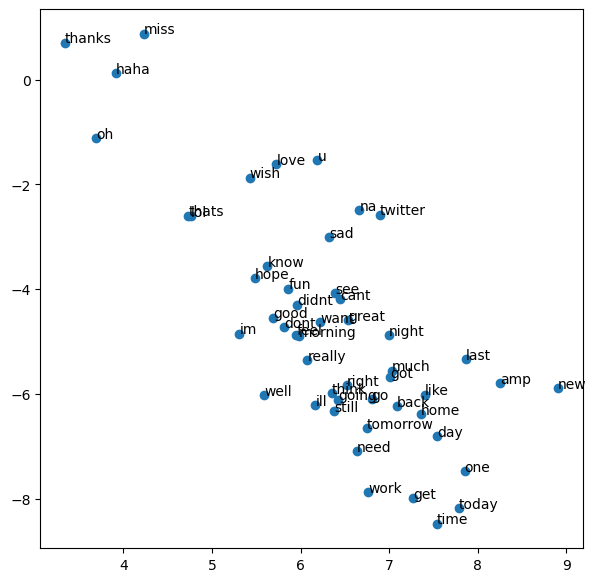

In [30]:
words = model_mini.wv.index_to_key[0:50]
x = X_mini_2d[0:50, 0]
y = X_mini_2d[0:50, 1]

plt.figure(figsize=(7,7))
plt.scatter(x, y)

for i, word in enumerate(words):
   plt.annotate(word, xy=(x[i], y[i]))

plt.show()

En la imagen anterior se observa que las palabras similares suelen estar juntas; en contraparte, las distintas se encuentran más lejanas entre sí.

Se puede utilizar el método `most_similar` para saber cuáles palabras tienen un significado más cercano a otra (por ejemplo, a `'right'`)

In [31]:
model_mini.wv.most_similar(['right'])

[('cause', 0.6531599760055542),
 ('moment', 0.6157314777374268),
 ('reason', 0.5904804468154907),
 ('bc', 0.5865699648857117),
 ('atm', 0.5781642198562622),
 ('cuz', 0.5709867477416992),
 ('still', 0.5599790215492249),
 ('somewhere', 0.5576075315475464),
 ('prawnnn', 0.5553067922592163),
 ('really', 0.5498731732368469)]

# 4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.

### Entrenar el modelo de clasificación

Como se mencionó con anterioridad la base de datos con la que se está trabajando contiene las siguientes variables:

*   **target**: La polaridad del tweet (0 = negativo, 2 = neutro, 4 = positivo)
*   **ids**: El id of del tweet ( 2087)
*   **date**: La fecha del tweet (Sat May 16 23:58:44 UTC 2009)
*   **flag**: El *query* (lyx). Si no hay *query*, entonces el valor es NO_QUERY.
*   **user**: the user that tweeted (robotickilldozr)
*   **text**: the text of the tweet (Lyx is cool)

Y ya se construyó la variables **text_without_stopwords** que contiene la información limpia, tokenizada y procesada de la columna **text**


In [32]:
df.head()

,target,ids,date,flag,user,text,text_without_stopwords
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[switchfoot, awww, thats, a, bummer, you, shou...","[switchfoot, awww, thats, bummer, shoulda, got..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[nationwideclass, no, its, not, behaving, at, ...","[nationwideclass, behaving, im, mad, cant, see]"


Esta información nos permite determinar los datos que se utilizarán para este análisis, que serán **"target"**, **"user"** y **"text_without_stopwords"**.

Como se muestra en la celda inferior la variable **"flag"** no se va a utilizar debido a que todos los valores son "NO_QUERY", por lo que no es una variable valiosa para este análisis.

En cambio, la variable **"user"**, como se observa en las siguientes celdas muestra que hay usuarios que escriben muchos tweets, es decir, hay una relación "many to one". Un usuario puede escribir muchos textos, pero un texto pertenece a un solo usuario. El punto es que es probable que haya usuarios con sentimientos permanentemente negativos y vicversa.

También puede darse el caso de usuarios que cambien constantemente el sentimiento de los mensajes. El incluir esta variable permitirá saber si es importante o no para el análisis.



In [33]:
df[df['flag'] != "NO_QUERY"].head()

,target,ids,date,flag,user,text,text_without_stopwords


In [34]:
df['flag'].value_counts()

flag
NO_QUERY    1600000
Name: count, dtype: int64

In [35]:
df['user'].value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: count, Length: 659775, dtype: int64

Lo primero es construir el df con el que se va a trabajar y eliminar todos los signos de puntuación de los datos, incluyendo las comas.

Con esta intención se recupera el mensaje, ya limpio de basura pero incluyendo todavía las palbaras de parada, para que en el análisis de sentimiento no se pierda la intención del mismo y pueda capturarse correctamente la información para la predicción del modelo.

In [36]:
dfNew = df[['target', 'user', 'text']]
dfNew.head()

,target,user,text
0,0,_TheSpecialOne_,"[switchfoot, awww, thats, a, bummer, you, shou..."
1,0,scotthamilton,"[is, upset, that, he, cant, update, his, faceb..."
2,0,mattycus,"[kenichan, i, dived, many, times, for, the, ba..."
3,0,ElleCTF,"[my, whole, body, feels, itchy, and, like, its..."
4,0,Karoli,"[nationwideclass, no, its, not, behaving, at, ..."


In [37]:
def remove_punctuation(text):
    final = " ".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"', ","))
    return final
#dfNew['text'] = dfNew['text'].apply(remove_punctuation)
#df = df.dropna(subset=['text_without_stopwords'])
dfNew['text'] = dfNew['text'].apply(remove_punctuation)

E:\Users\83509\AppData\Local\Temp\ipykernel_35752\3187449052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['text'] = dfNew['text'].apply(remove_punctuation)


In [38]:
dfNew['text']

0          switchfoot awww thats a bummer you shoulda got...
1          is upset that he cant update his facebook by t...
2          kenichan i dived many times for the ball manag...
3             my whole body feels itchy and like its on fire
4          nationwideclass no its not behaving at all im ...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom very cool to hear old walt interview...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Se aplicará un LabelEncoder para transformar la variable 'target' a un binaria con números 0 y 1. Esto hará que la elabporación del modelo de clasificación sea más sencillo.

In [39]:
encoder = LabelEncoder()

In [40]:
dfNew["target"] = encoder.fit_transform(dfNew["target"])

E:\Users\83509\AppData\Local\Temp\ipykernel_35752\3792216353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew["target"] = encoder.fit_transform(dfNew["target"])


In [41]:
dfNew.head()

,target,user,text
0,0,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda got...
1,0,scotthamilton,is upset that he cant update his facebook by t...
2,0,mattycus,kenichan i dived many times for the ball manag...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,nationwideclass no its not behaving at all im ...


En la celda inferior se muestra el conteo y el resultado de la transformación realizada.

In [42]:
dfNew['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

El orden de los array mostrados en las siguiente celda indican que se le asignó el 0 al 0, que se refiere a comentarios negativos y el 1 al 4 que contiene comentarios positivos.

In [43]:
encoder.classes_

array([0, 4], dtype=int64)

Ahora dividiremos el dataset en conjuntos de entrenamiento y prueba. El 80 % de los datos se utilizará para entrenamiento y el 20 % para pruebas.


In [44]:
X = dfNew.drop(['target'], axis=1)
y = dfNew['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#index = dfNew.index

In [47]:
#dfNew['random_number'] = np.random.randn(len(index))

In [48]:
#train = dfNew[dfNew['random_number'] <= 0.8]
#test = dfNew[dfNew['random_number'] > 0.8]

In [49]:
#train.head()

Ahora se creará una bolsa de palabras mediante el vectorizador de conteo de la biblioteca Scikit-learn para obtener un modelo de bolsa de palabras, que contendrá una matriz dispersa de enteros.

Así, al final de esta sección, se contará e imprimirá el número de ocurrencias de cada palabra.

In [50]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])

In [51]:
#train_matrix

In [52]:
#test_matrix

In [53]:
#train_matrix.shape

Ahora se realizará la Regresión logística, en donde se establecieron 10,000 iteraciones para evitar que el modelo arroje un error.

In [54]:
lr_model = LogisticRegression(max_iter=10000)

Y dividimos los datos en variables independientesy dependientes.

In [55]:
# X_train = train_matrix
# X_test = test_matrix
# y_train = train['target']
# y_test = test['target']

Entrenamos el modelo de predicción

In [56]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
predictions = lr_model.predict(X_test)

predictions

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

### Graficar la matriz de confusión

In [58]:
cf_matrix = confusion_matrix(predictions,y_test)
cf_matrix

array([[125423,  30059],
       [ 34071, 130447]], dtype=int64)

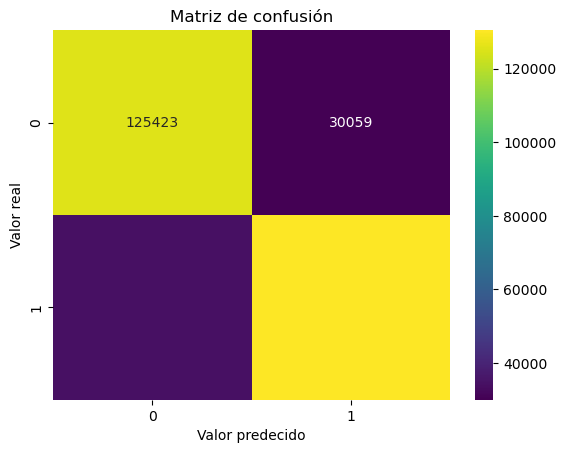

In [59]:
sns.heatmap(cf_matrix, annot= True, fmt= '.0f', cmap= 'viridis')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

La matriz de confusión muestra que cerca del 40.76% del total de comentarios en la matriz de prueba fueron positivos y se acertaron correctamente (130,457 de 320,000), mientras que el 39.19% fueron comentarios negativos y se predijeron acertadamente (125,427 de 320,000).
El 20% restante fueron falsos positivos y falsos negativos.

In [60]:
X_test.shape[0]

320000

### Imprimir la matriz de precisión

In [61]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80    155482
           1       0.81      0.79      0.80    164518

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



La precisión general del modelo en los datos de prueba es de alrededor del 80 %, que es justamente lo que se describió en la matriz de confusión, previamente. El resultado es óptimo, nos indica una buena capacidad de predicción y una poco probabilidad de sobreajuste en el modelo.


### Prueba con un texto.

Ahora hagamos una prueba de predicción con la siguiente reseña en inglés: "A mi no me parece que lo que se dice sea inteligente. No creo que nadie en su sano juicio pueda pensar así." **El resultado debiera ser negativo, es decir 0.**

In [62]:
review_test = "It does not seem to me that what is said is intelligent. I don't think anyone in their right mind can think like that."

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr_model.predict(review_convert)
prediction_test

array([0], dtype=int64)

Ahora hagamos una prueba de predicción con una reseña positiva en inglés: "La verdad a mi me parece una gran persona, con una inteligencia excepcional y con un gran entusiasmo." **El resultado debiera ser positivo, es decir 1.**

In [63]:
review_test = "The truth seems to me a great person, with exceptional intelligence and great enthusiasm."

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr_model.predict(review_convert)
prediction_test

array([1], dtype=int64)

Vemos que con los ejemplos aportados. El modelo predice correctamente el discurso de sentimientos del tipo de comentario aportado.

# 5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y escribir las conclusiones de tus resultados.

### Entrenar el modelo de clasificación

Ahora entrenaré el modelo usando, como algoritmo de clasificación, Random Forest, que es un modelo predictivo formado por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Originalmente se buscó generar una submuestra para correr el modelo de Rndom Forest, dado que en google Colab tardaba mucho tiempo en correr el modelo (el trabajo realizado se muestra en la parte inferior, en donde se observa que se había hecho un submuestreo aleatorio de 70%), sin embargo se decidió correr el modelo en un Jupyter notebbok en mi pc y se ajustaron los parámetros para que se pudiera correr el modelo con el total de los datos, sin que colapse.

In [64]:
# Submuestreo de datos de entrenamiento (por ejemplo, usando solo el 70% de las observaciones)
#subset_size = 0.7
#subset_index = np.random.choice(X_train.shape[0], size=int(X_train.shape[0] * subset_size), replace=False)

In [65]:
#X_train_subset = X_train[subset_index]
#y_train_subset = y_train.iloc[subset_index]

Los parámetros ajustados para correr el Random Forest fueron los siguientes:

*    **"n_estimators"**: Determina la cantidad de árboles en el modelo, por lo que ajustandolo se puede reducir el tiempo de entrenamiento. Sin embargo, se debe equilibrar esto con el rendimiento del modelo para no limitar los resultados. Se hicieron varias pruebas y se corrió el modelo con 10, 100, 1,000 y 10,000 árboles. Encontré que entre 100 y 1,000 árboles el *accuracy* solo aumentaba 1%. Y de 1,000 a 10,000 el tiempo era excesivo y el *accuracy* no mejoraba. Por estos motivos se dejó el valor en 1,000.
*    **"n_jobs"**: Determina la cantidad de núcleos del CPU que se utilizan para los cálculos. Se estableció como -1 para pedir que se ocupen todos los núcleos de la pc.
*    **"max_depth"**: Se utiliza para limitar la profundidad máxima de los árboles puede acelerar el tiempo de entrenamiento y reducir el riesgo de sobreajuste. La profundidad máxima se estableció en 10, aunque inicialmente se empezó en 2 y se fue incrementando.


In [66]:
# Se crea el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=10, max_features='sqrt', random_state=42)

In [67]:
# Se ajusta el modelo creado
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [68]:
predictions_rf = rf_model.predict(X_test)

predictions_rf

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

### Graficar la matriz de confusión

In [69]:
#new = np.asarray(y_test)
cf_matrix_rf = confusion_matrix(predictions_rf,y_test)
cf_matrix_rf

array([[120374,  37664],
       [ 39120, 122842]], dtype=int64)

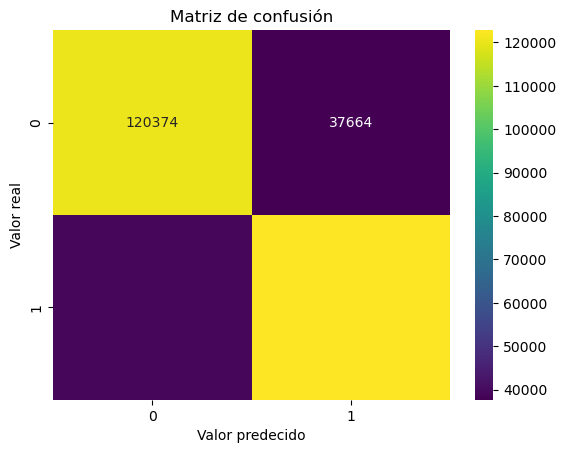

In [70]:
sns.heatmap(cf_matrix_rf, annot= True, fmt= '.0f', cmap= 'viridis')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

Para este modelo, la matriz de confusión explica correctamente el 76% de los datos (entre comentarios negativos y positivos), con lo que los falsos positivos y los falsos negativos aumentaron a 24%, ligeramente por encima de los obtenidos en el modelo logaritmo del apartado anterior.

### Imprimir la matriz de precisión

In [71]:
print(classification_report(predictions_rf,y_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76    158038
           1       0.77      0.76      0.76    161962

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



La precisión general del modelo en los datos de prueba es de alrededor del 76 %, no es malo, pero se encuentra por debajo del nivel de precisión del modelo logístico estimado.### Prueba con un texto.


### Prueba con un texto.

Ahora Vamos a hacer la prueba de predicción con las reseñas usadas en el apartado 4.
Em pezamos con la siguiente reseña en inglés: "A mi no me parece que lo que se dice sea inteligente. No creo que nadie en su sano juicio pueda pensar así." **El resultado debiera ser negativo, es decir 0.**

In [72]:
review_test = "It does not seem to me that what is said is intelligent. I don't think anyone in their right mind can think like that."

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr_model.predict(review_convert)
prediction_test

array([0], dtype=int64)

Usaremos, ahora, la misma reseña positiva del apartado anterior: "La verdad a mi me parece una gran persona, con una inteligencia excepcional y con un gran entusiasmo." **El resultado debiera ser positivo, es decir 1.**

In [73]:
review_test = "The truth seems to me a great person, with exceptional intelligence and great enthusiasm."

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr_model.predict(review_convert)
prediction_test

array([1], dtype=int64)

Al igual que en el apartado 4, este modelo (Random Forest) predice correctamente el discurso de sentimientos del tipo de comentario aportado.

# Anexo (Procesos que requieren explicación)

## Limpieza de Datos

### Remover los URL de los Tweets

La función re.compile crea un objeto de expresión regular compilando un patrón de expresión regular, que se puede utilizar como patrón de coincidencia en las funciones re.match, re.search, etc....

La expresión comienza con la letra 'r' para indicar que los caracteres especiales dentro de la cadena se interpretarán de manera especial y no de forma "cruda". En el caso de la expresión ***r'https?://\S+|www\.\S+'***, se asegura que \S y otros caracteres con barra invertida se interpreten como parte de la expresión regular y no como secuencias de escape de cadena de Python.

En este caso:

*   **"?"** Hace que la expresión resultante coincida con 0 o 1 repeticiones de la apalabra anterior. Ejemplo: ab? coincidirá con 'a' o 'ab'.
*   **"\S+"** es un patrón que busca coincidencias con cualquier secuencia de caracteres que no sean espacios en blanco.

En el contexto de la expresión ***r'https?://\S+|www\.\S+'***, se utiliza para capturar la parte de la URL después del protocolo (http o https) y ://, o después de www.. La parte "\S+" asegura que estás capturando cualquier secuencia de caracteres que no sea un espacio en blanco, lo que generalmente corresponderá a la parte del dominio de la URL.


### Remover números

La función re.sub se utiliza para realizar sustituciones en una cadena basada en expresiones regulares.

El patrón \d+ se utiliza para buscar coincidencias con secuencias de uno o más dígitos en una cadena. Aquí está el significado de los componentes:

*   ***\d***: Este es un metacarácter que coincide con cualquier dígito (0-9).
*   ***+***: Este es un cuantificador que indica que el carácter precedente (\d en este caso) debe aparecer al menos una vez, pero puede repetirse más veces.

Entonces, **\d+** en conjunto significa "coincidir con una secuencia de uno o más dígitos".

En la expresión de abajo se sustituye la secuencia numérica por un espacio vacío.


### Quitar signos de puntuación

La instrucción se utiliza para eliminar todos los signos de puntuación de una cadena en Python.

*   ***string.punctuation***: Este es un string predefinido en el módulo string que contiene todos los caracteres de puntuación comunes. Por ejemplo, ***[!”#$%&'()*+,-./:;<=>?@[\]^_`{|}~]***:

*   ***str.maketrans('', '', string.punctuation)***: Esta parte crea una tabla de traducción que se utiliza para mapear cada carácter de puntuación a None (es decir, eliminándolos). str.maketrans es un método de clase de la clase str que construye una tabla de traducción.

*   ***text.translate(...)***: Este método de la cadena (text) utiliza la tabla de traducción creada anteriormente para realizar la traducción. En este caso, la traducción implica eliminar todos los caracteres que están en la lista de puntuación.

## Generar Nube de palabras de acuerdo al target del Tweet

### Parámetros de la función WordCloud

Para crear la nube se utilizaron los siguientes parámetros:

*   **width y height**: Establecen el tamaño de la imagen de la nube de palabras.
*   **background_color**: Establece el color de fondo de la nube de palabras.
*   **generate**: Acepta un texto como entrada y genera la nube de palabras.



## Vectorización de los textos y justificación de la elección del vectorizador y optimizador.

### Word2Vec

Requiere tres argumentos:
- `sentences`: en donde se indica la localización de las listas de palabras limpias y procesadas.
- `min_count`: señala el mínimo de apariciones de una palabra para considerarla en la vectorización. Al indicar que el mínimo es `1`, significa que todas las palabras tendrán su respectivo vector.
- `vector_size`: controla la dimensionalidad de los vectores de palabra aprendidos durante el proceso de entrenamiento.

La elección del tamañode vec_size depende de varios factores, como:

*   **Tamaño del Conjunto de Datos**: En general, con conjuntos de datos más grandes, puedes permitirte utilizar vectores de palabra de mayor dimensión. Si tienes un conjunto de datos pequeño, usar un tamaño de vector más pequeño puede ser más apropiado.

*   **Complejidad Semántica**: Si estás trabajando con texto que tiene relaciones semánticas más complejas, como documentos largos o vocabularios ricos, un tamaño de vector más grande puede ser beneficioso para capturar esas complejidades.

*   **Recursos Computacionales**: Vectores de palabras más grandes requieren más recursos computacionales durante el entrenamiento y el uso posterior del modelo. Si estás limitado en recursos, es posible que desees reducir el tamaño de los vectores.
